In [1]:
import os

import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import torch
import torch.nn as nn
from torchvision import transforms
from torchvision.models import vgg19

from utils import get_features, transformation_max, transformation_mean, get_weights, show

# Data Preprocessing

In [2]:
images_name = os.listdir('data/sneakers')
images = [Image.open(f"data/sneakers/{name}") for name in images_name]

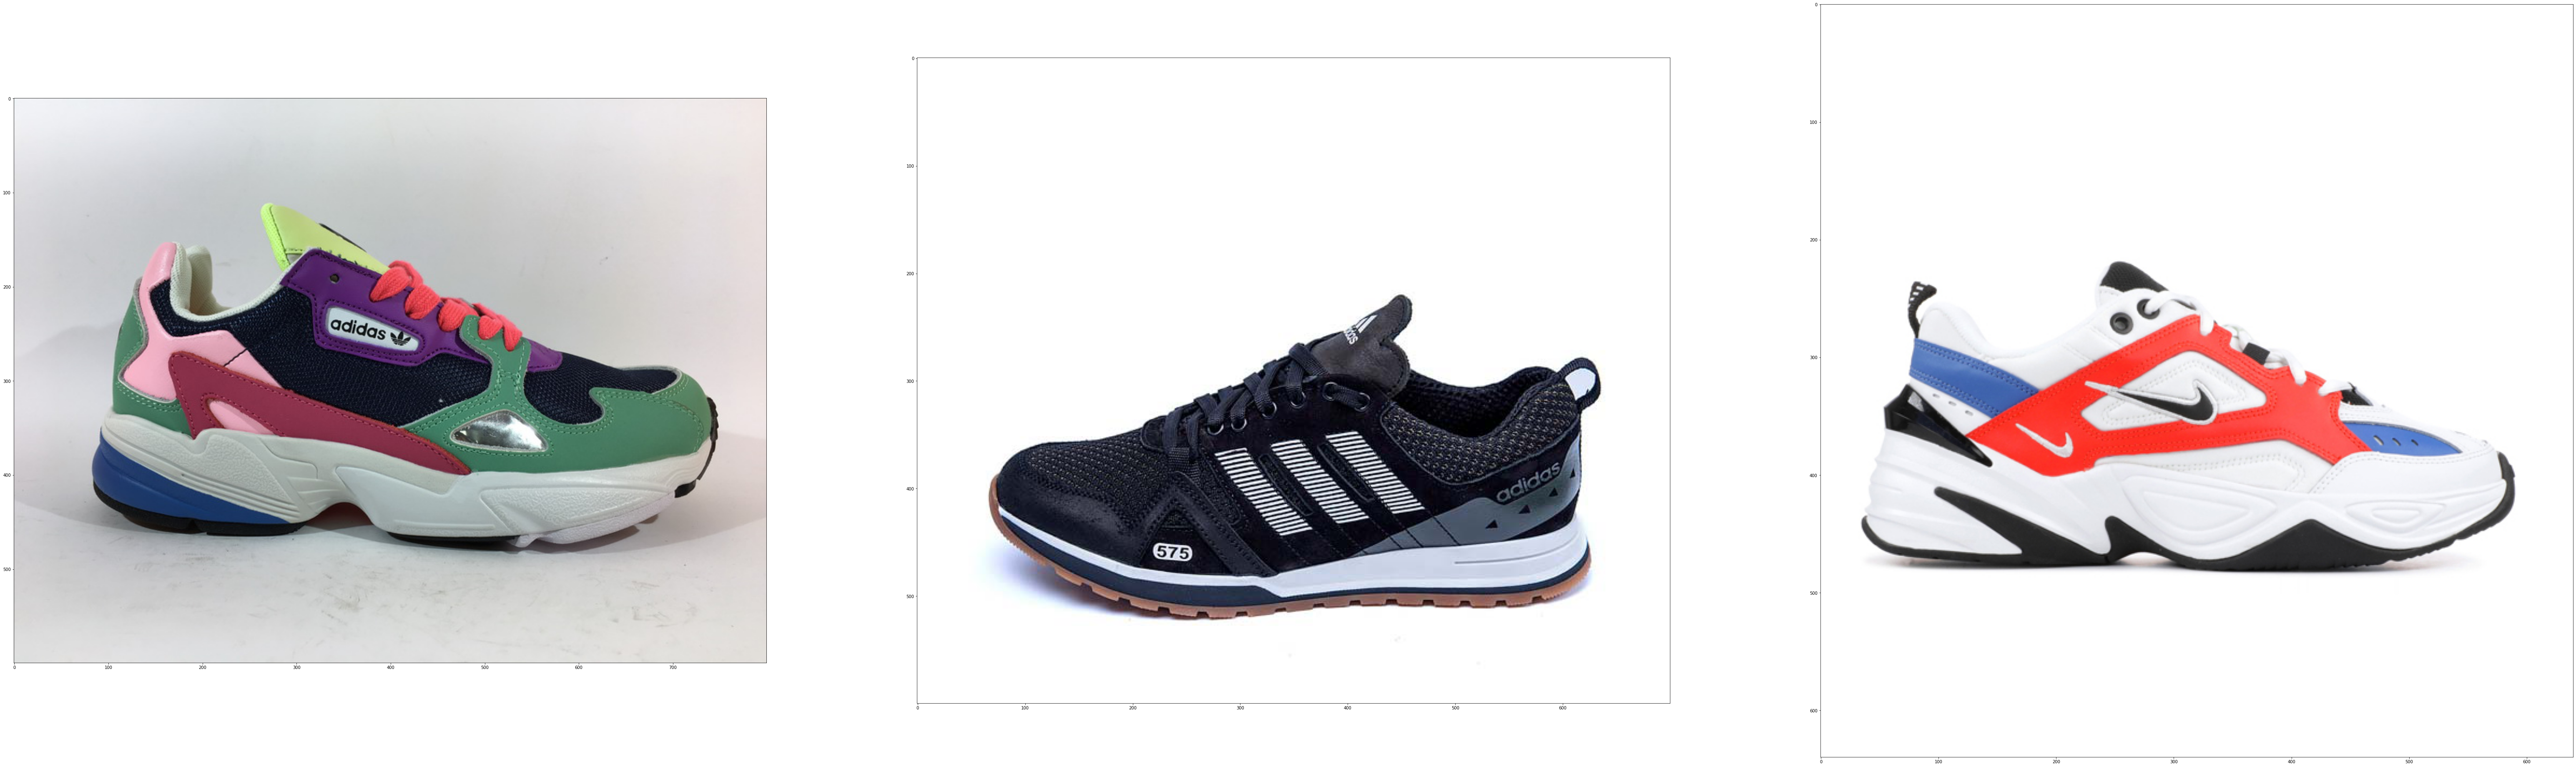

In [3]:
show(images)

In [4]:
SIZE = 500
transform = transforms.Compose([
    transforms.Resize((SIZE, SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(
        (0.485, 0.456, 0.406), 
        (0.229, 0.224, 0.225)
    )
])

images_tensor = [transform(img).unsqueeze(0) for img in images]

# Model

In [5]:
vgg = vgg19(pretrained=True).features

for param in vgg.parameters():
    param.requires_grad_(False)
    
    
vgg;

![alt text](data/vgg19.png "Title")

In [6]:
layers = {
    '0':  'conv1_1',
    '5':  'conv2_1', 
    '10': 'conv3_1', 
    '19': 'conv4_1',
    '28': 'conv5_1'
}

textures = [get_features(img, vgg, layers) for img in images_tensor]

# Get first conv layer

### *max_func*

In [7]:
result = []
for texture in textures:
    conv1 = texture.get('conv1_1')
    result.append(transformation_max(conv1))

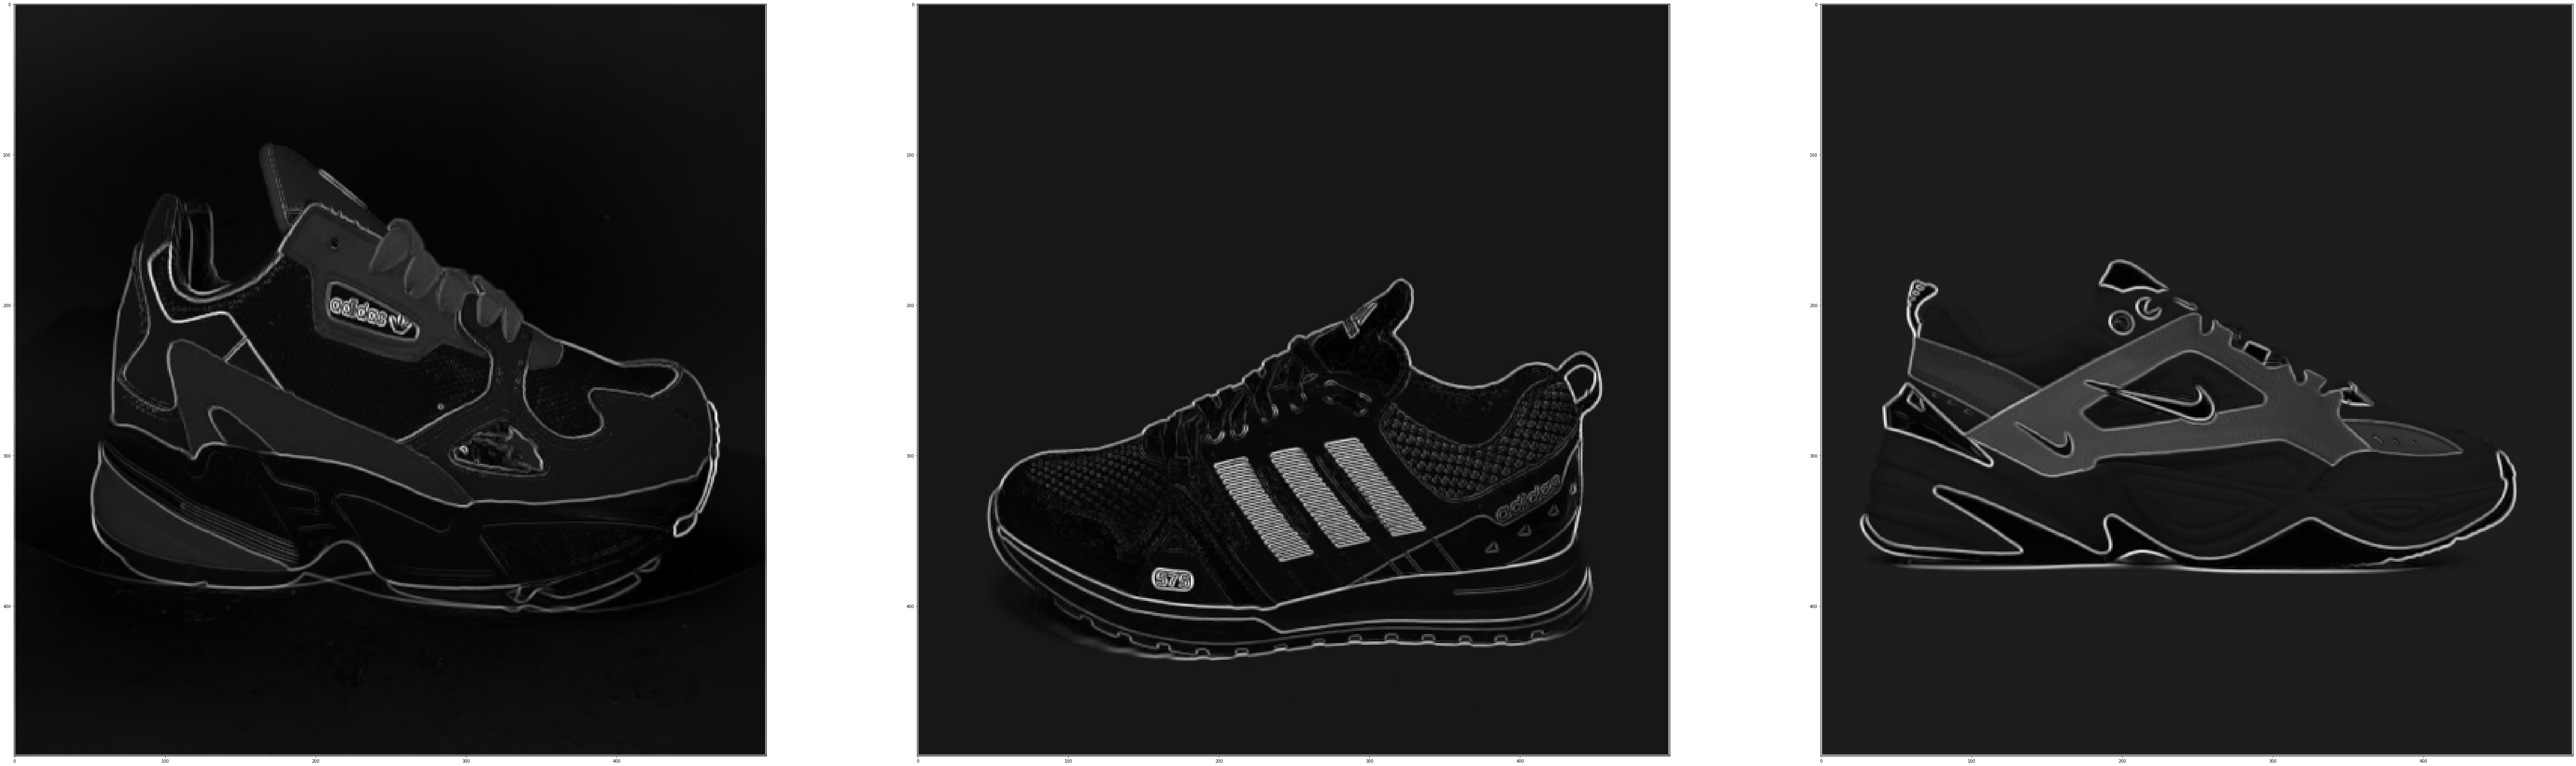

In [8]:
show(result)

### *mean_func*

In [9]:
result = []
for texture in textures:
    conv1 = texture.get('conv1_1')    
    result.append(transformation_mean(conv1, get_weights(1)))

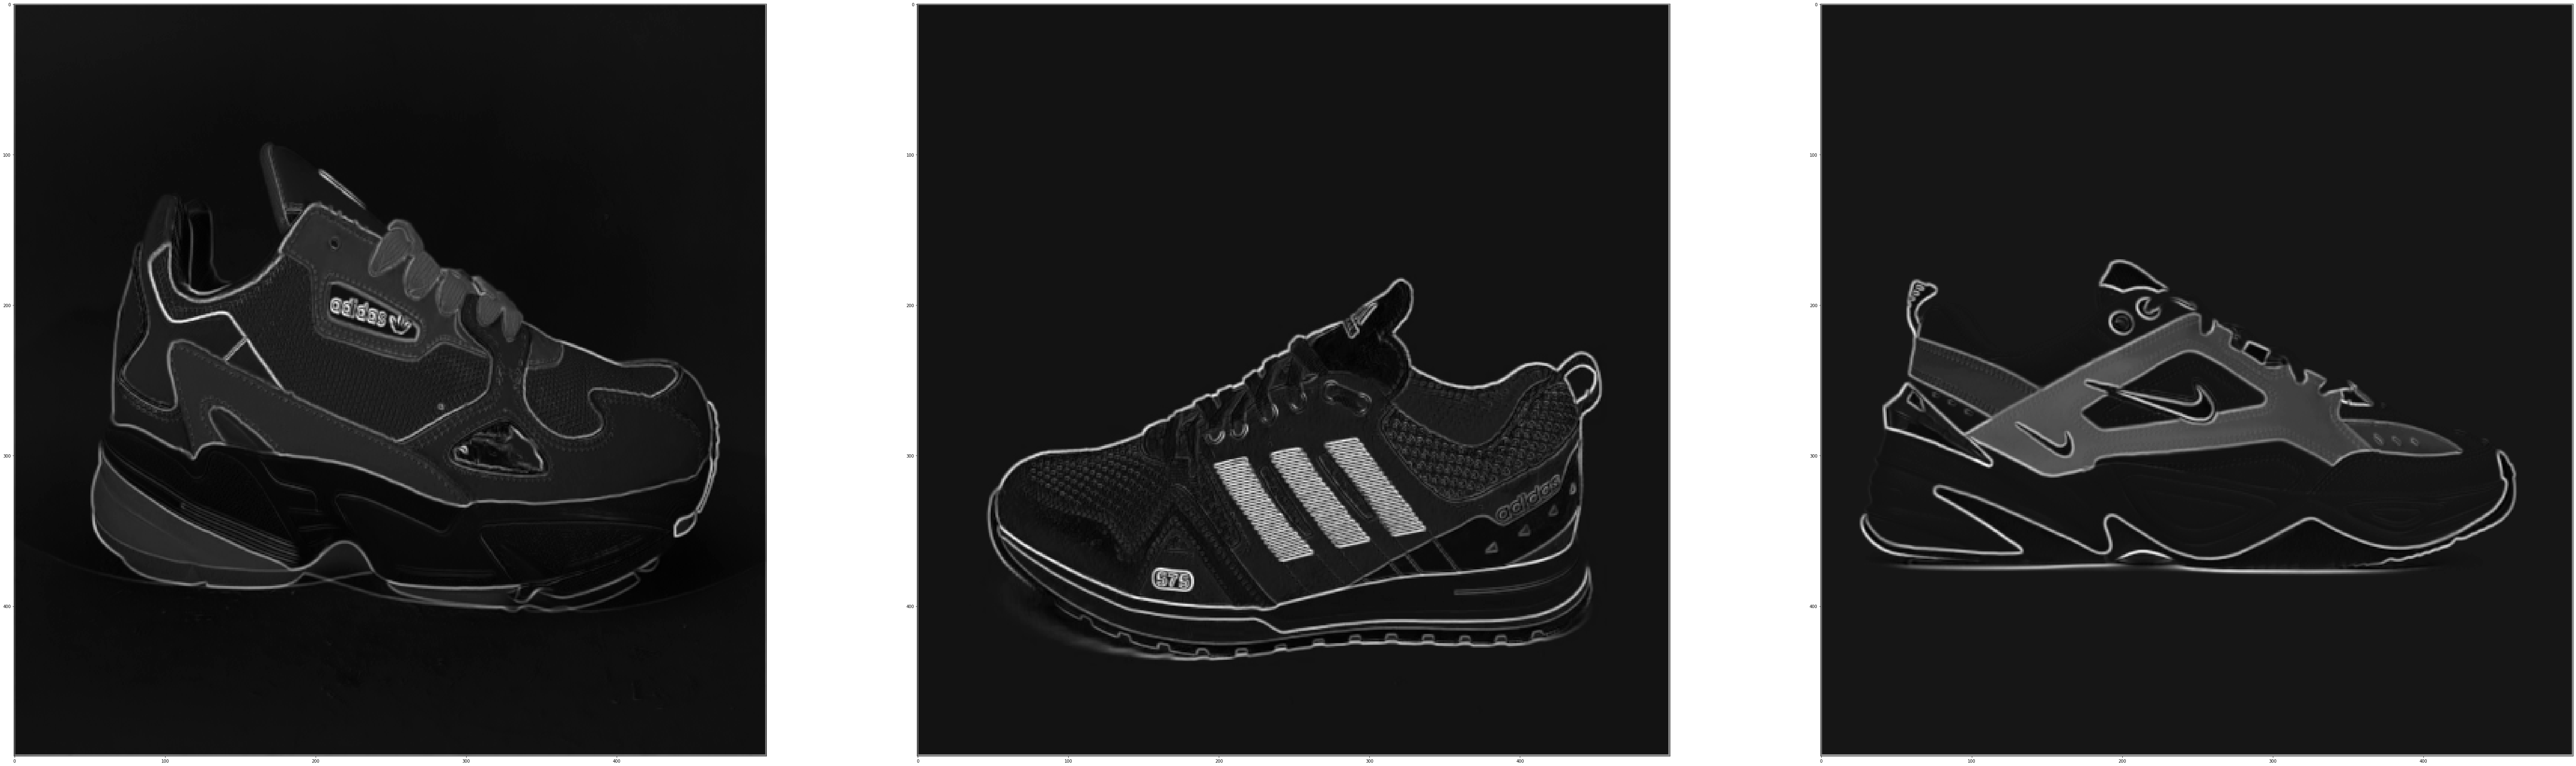

In [10]:
show(result)

# Get all conv layers

### *max_func*

In [11]:
result = []
for texture in textures:
    
    new_blocks = {}
    for idx, block in texture.items():
        scale_factor = SIZE / block.size()[-1]
        m = nn.Upsample(scale_factor=scale_factor, mode='nearest')    
        block_new = m(block)
        new_blocks[idx] = block_new

    all_blacks = torch.cat(tuple(new_blocks.values()), 1)
    result.append(transformation_max(all_blacks))

/home/sashatr/Desktop/textures/venv/lib/python3.6/site-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


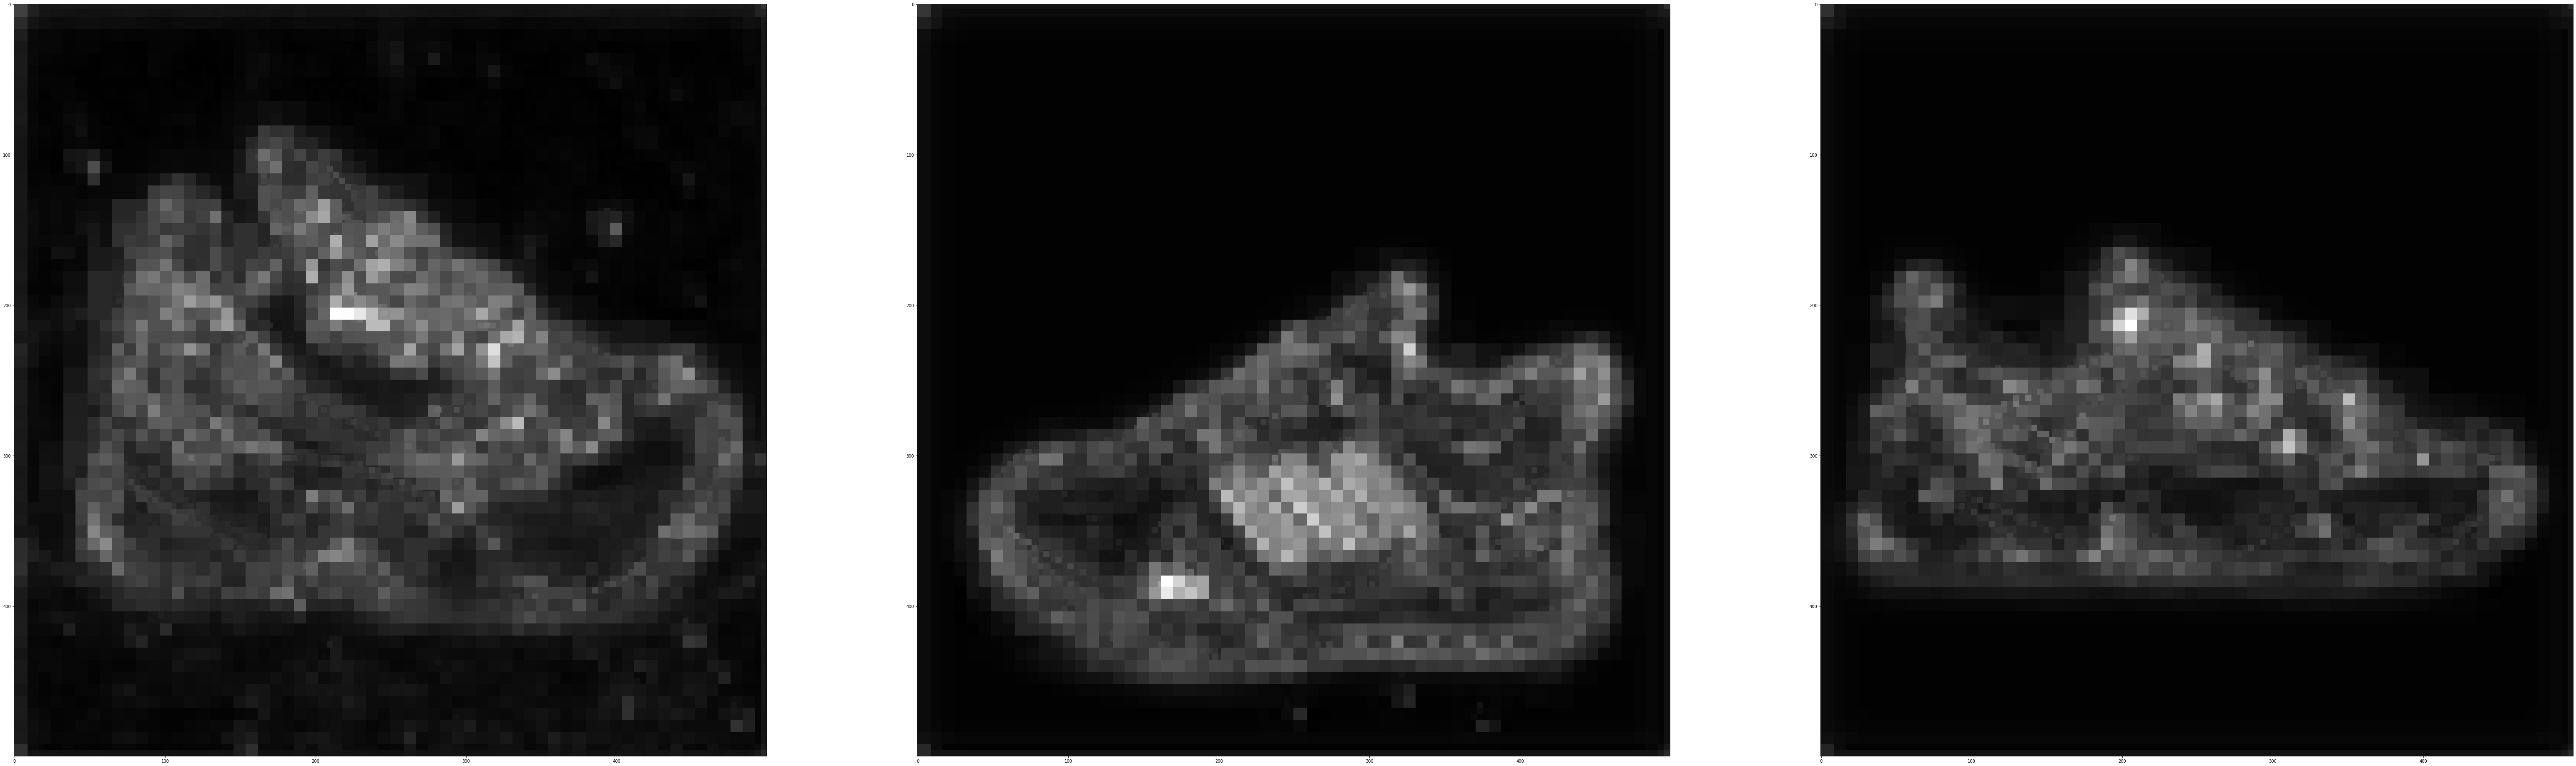

In [12]:
show(result)

### *mean_func*

In [13]:
result = []
for texture in textures:
    
    new_blocks = {}
    for idx, block in texture.items():
        scale_factor = SIZE / block.size()[-1]
        m = nn.Upsample(scale_factor=scale_factor, mode='nearest')    
        block_new = m(block)
        new_blocks[idx] = block_new

    all_blacks = torch.cat(tuple(new_blocks.values()), 1)    
    result.append(transformation_mean(all_blacks, get_weights(5)))

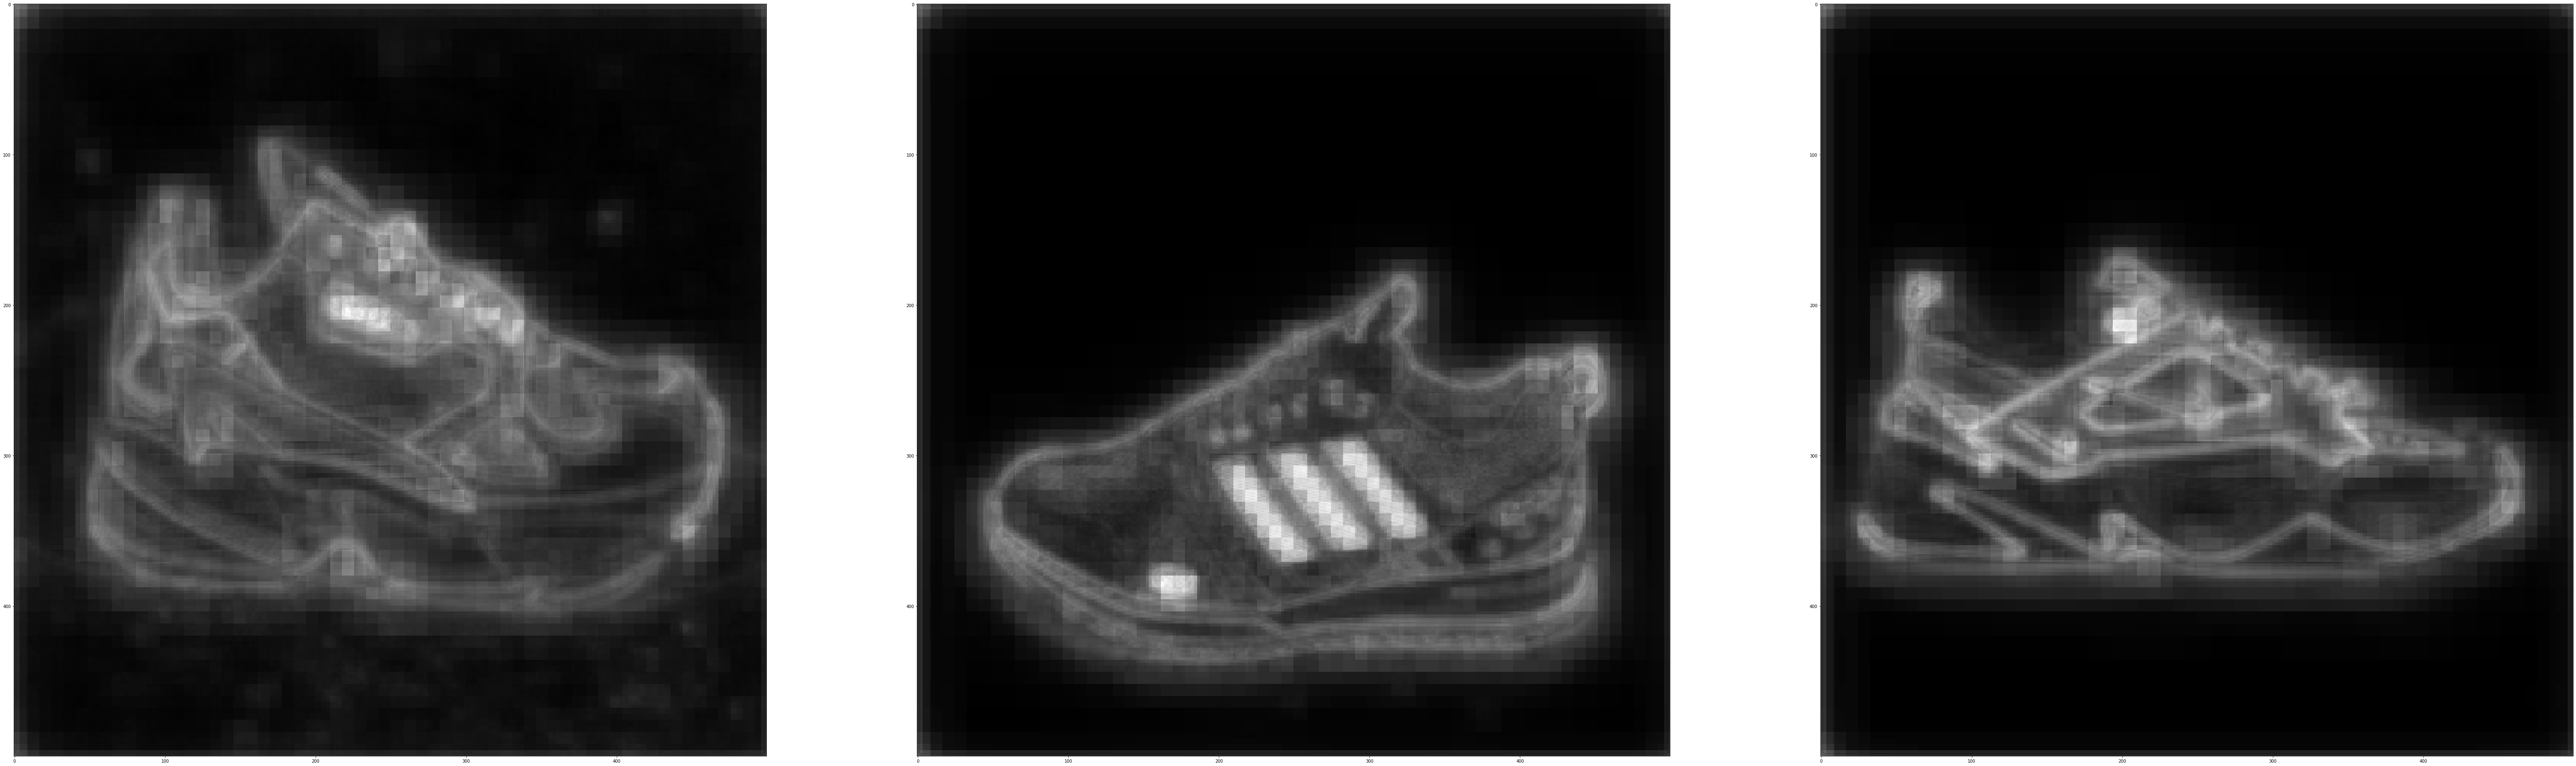

In [14]:
show(result)

# Get first two conv layers

### *max_func*

In [15]:
result = []
for texture in textures:
    
    new_blocks = {}
    for idx, block in texture.items():
        if idx not in ['conv1_1', 'conv2_1']:
            break
            
        scale_factor = SIZE / block.size()[-1]
        m = nn.Upsample(scale_factor=scale_factor, mode='nearest')    
        block_new = m(block)
        new_blocks[idx] = block_new

    all_blacks = torch.cat(tuple(new_blocks.values()), 1)
    result.append(transformation_max(all_blacks))

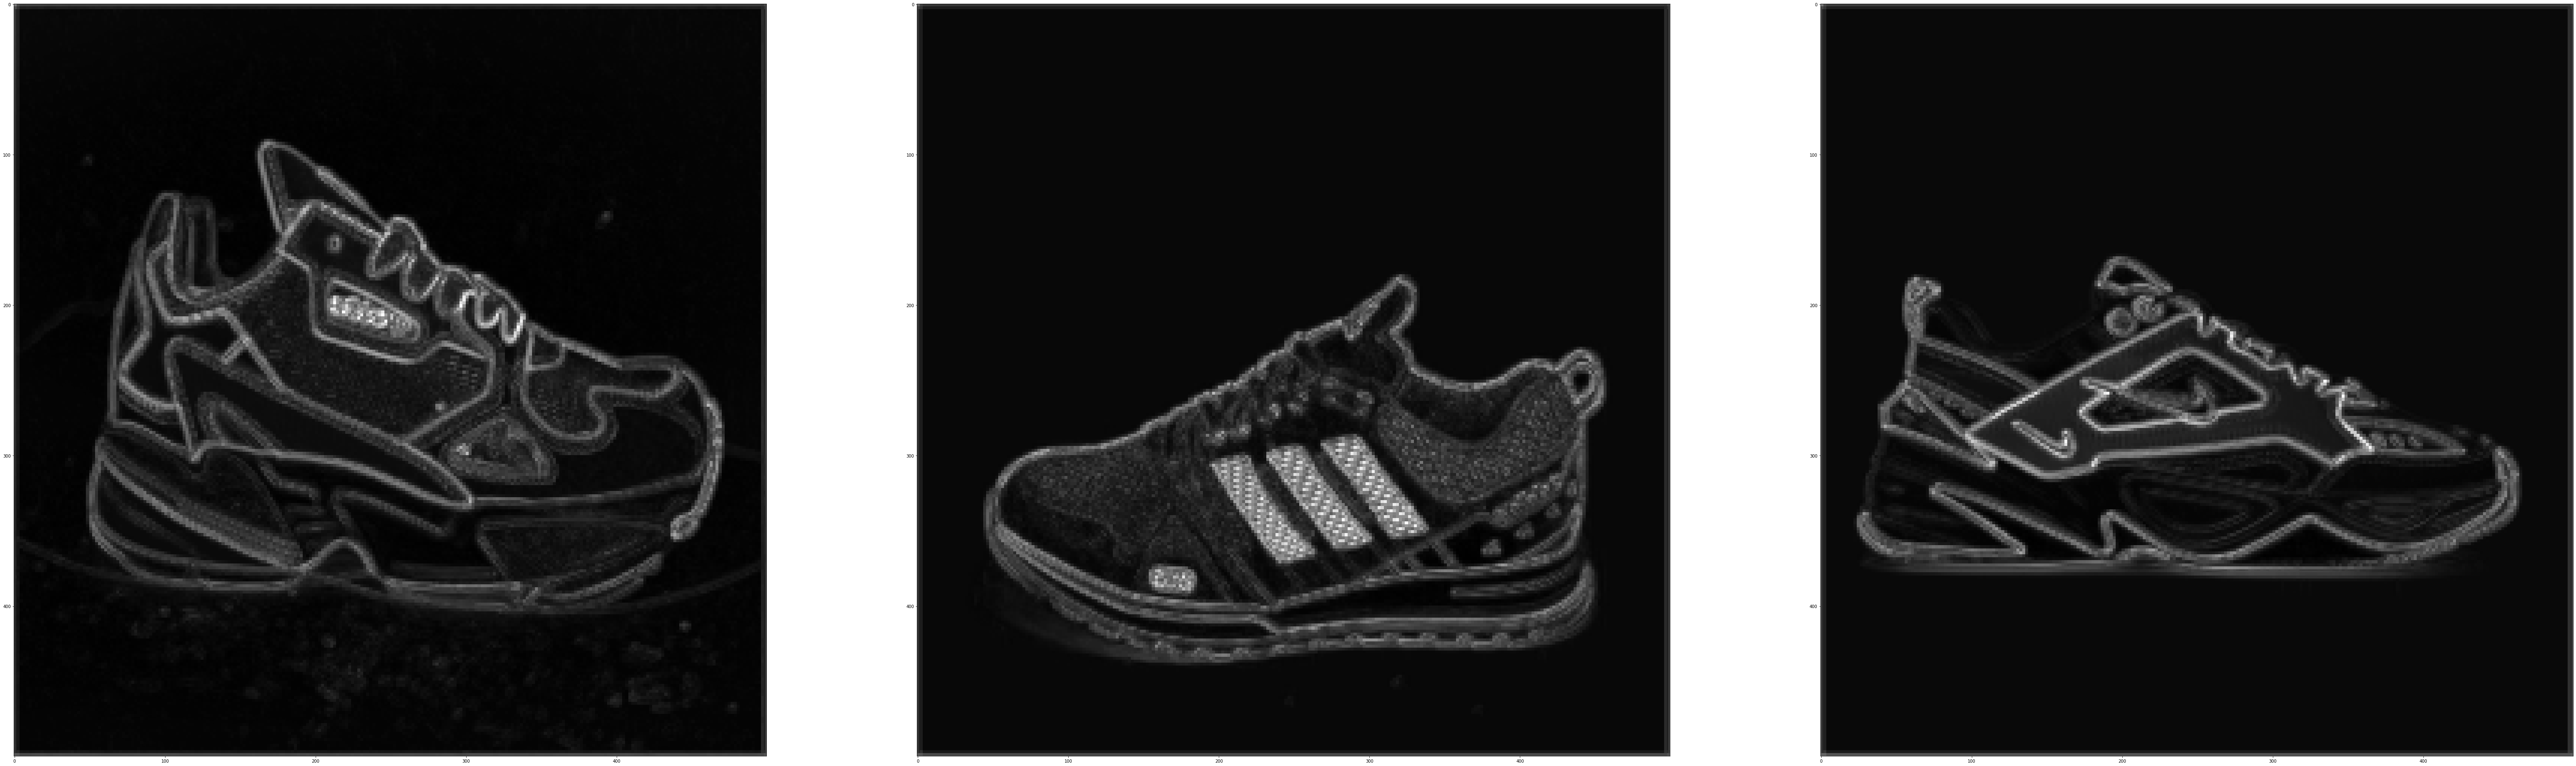

In [16]:
show(result)

### *mean_func*

In [17]:
result = []
for texture in textures:
    
    new_blocks = {}
    for idx, block in texture.items():
        if idx not in ['conv1_1', 'conv2_1']:
            break
        scale_factor = SIZE / block.size()[-1]
        m = nn.Upsample(scale_factor=scale_factor, mode='nearest')    
        block_new = m(block)
        new_blocks[idx] = block_new

    all_blacks = torch.cat(tuple(new_blocks.values()), 1)    
    result.append(transformation_mean(all_blacks, get_weights(2)))

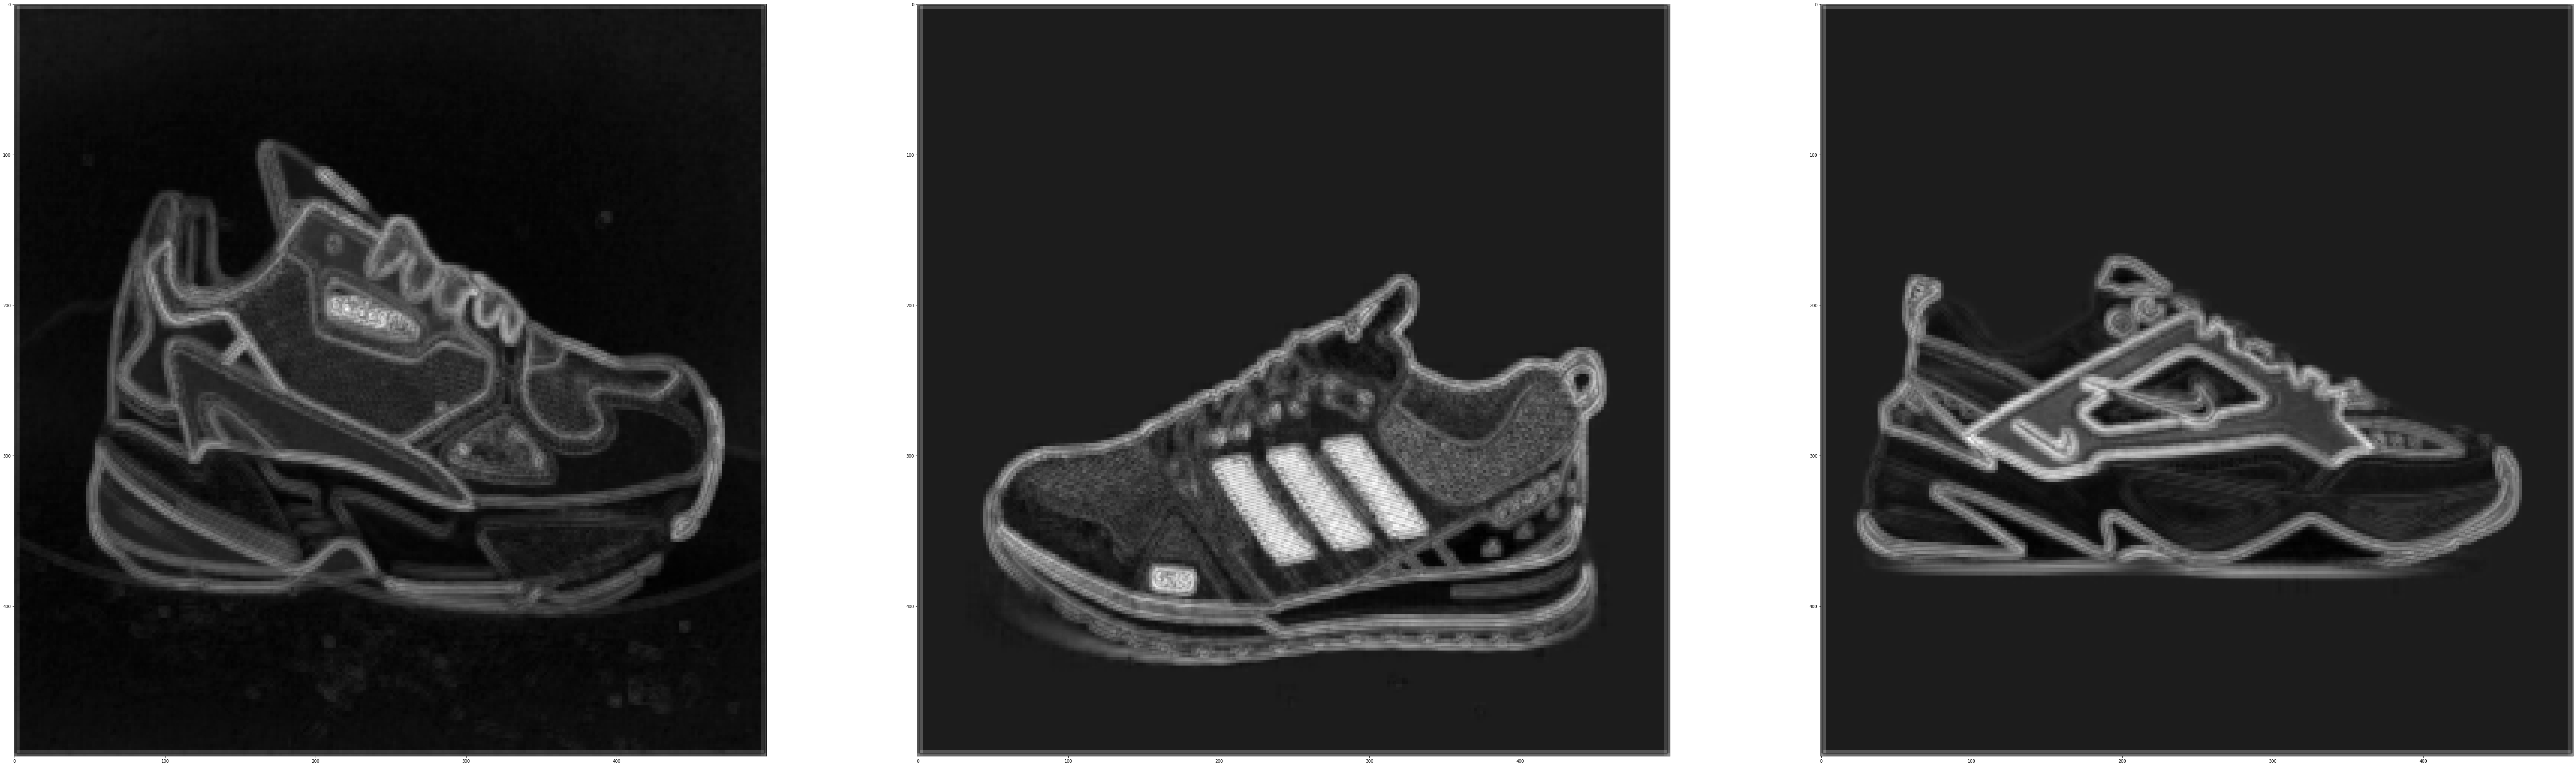

In [18]:
show(result)